(qr-section)=
# QR decomposition

The methods of LU and Cholesky decomposition can be used to solve a system of linear equations where the number of equations is the same as the number of unknowns so it has a single unique solution. QR factorisation can be used to solve an [**overdetermined system**](https://en.wikipedia.org/wiki/Overdetermined_system) where the number of equations is greater than the number of unknowns. Overdetermined systems rarely have a unique solution but we can calculate an approximation that most closely satisfies all equations in the system.

The $m\times n$ matrix $A$ is factorised into the product of two matrices such that

\begin{align*}
    A = QR,
\end{align*}

where $Q$ is an orthogonal matrix and $R$ is an upper triangular matrix.

````{admonition} Definition: Orthogonal vectors
:class: note
:name: orthogonal-vector-definition

A set of vectors $\lbrace \mathbf{v}_1 ,\mathbf{v}_2 ,\mathbf{v}_3 ,\dots \rbrace$ is said to be **orthogonal** if $\mathbf{v}_i \cdot \mathbf{v}_j =0$ for $i\not= j$. Furthermore the set is said to be **orthonormal** if $\mathbf{v}_i$ are all unit vectors.
````

````{admonition} Definition: Orthogonal matrix
:class: note
:name: orthogonal-matrix-definition

An **orthogonal matrix** is a matrix where the columns are a set of orthonormal vectors. If $A$ is an orthogonal matrix if

\begin{align*}
    A\mathrm{T} A=I.
\end{align*}
````

````{admonition} Example 6.8
:class: seealso
:name: orthogonal-matrix-example

Show that the following matrix is an orthogonal matrix

\begin{align*}
    A= \begin{pmatrix}
        0.8 & -0.6\\
        0.6 & 0.8
    \end{pmatrix}.
\end{align*}

```{dropdown} Solution

Checking $A\mathrm{T} A=I$

\begin{align*}
    A\mathrm{T} A=\begin{pmatrix}
        0.8 & 0.6\\
        -0.6 & 0.8
    \end{pmatrix}
    \begin{pmatrix}
        0.8 & -0.6\\
        0.6 & 0.8
    \end{pmatrix} = 
    \begin{pmatrix}
        1 & 0\\
        0 & 1
    \end{pmatrix}=I.
\end{align*}

So $A$ is an orthogonal matrix.

```
````

(qr-gram-schmidt-section)=
## QR decomposition using the Gram-Schmidt process

The calculation of the orthogonal matrix $Q$ can be achieved by using the **Gram-Schmidt process**. Given a ordered set of $n$ linearly independent column vectors $(\mathbf{a}_1 ,\mathbf{a}_2 ,\dots ,\mathbf{a}_n)$ we wish to find a set that consists of $n$ orthogonal vectors $(\mathbf{u}_1 ,\mathbf{u}_2 ,\dots ,\mathbf{u}_n)$ where the span of $(\mathbf{a}_1 ,\mathbf{a}_2 ,\dots ,\mathbf{a}_n)$ is that same as the span of $(\mathbf{u}_1 ,\mathbf{u}_2 ,\dots ,\mathbf{u}_n)$.

```{figure} ../Images/gram_schmidt.png
:name: gram-schmidt-figure

The Gram-Schmidt process
```

Consider the diagram in {numref}`gram-schmidt-figure` where we have vectors $\mathbf{a}_1$ and $\mathbf{a}_2$. Let $\mathbf{u}_1 = \mathbf{a}_1$ then the vector that is orthogonal to $\mathbf{u}_1$, $\mathbf{u}_2$, can be found by subtracting the [**vector projection**](https://en.wikipedia.org/wiki/Vector_projection) of $\mathbf{a}_2$ onto $\mathbf{u}_1$, 

\begin{align*}
    \mathbf{u}_2 =\mathbf{a}_2 - \operatorname{proj}_{\mathbf{u}_1 } (\mathbf{a}_2).
\end{align*}

For the next vector $\mathbf{u}_3$ we want this to be orthogonal to both $\mathbf{u}_1$ and $\mathbf{u}_2$. To find $\mathbf{u}_3$ we subtract the projection of $\mathbf{a}_3$ onto $\mathbf{u}_1$ and $\mathbf{u}_2$ from $\mathbf{a}_3$. Doing similar for all vectors in $A$ we have

\begin{align*}
    \mathbf{u}_1 &=\mathbf{a}_1 , & 
    \mathbf{q}_1 &=\frac{\mathbf{u}_1 }{\|\mathbf{u}_1 \|},\\
    \mathbf{u}_2 &=\mathbf{a}_2 -{\textrm{proj}}_{\mathbf{u}_1 } (\mathbf{a}_2 ), & 
    \mathbf{q}_2 &=\frac{\mathbf{u}_2 }{\|\mathbf{u}_2 \|},\\
    \mathbf{u}_3 &=\mathbf{a}_3 -{\textrm{proj}}_{\mathbf{u}_1 } (\mathbf{a}_3 )-{\textrm{proj}}_{\mathbf{u}_2 } (\mathbf{a}_3 ), & 
    \mathbf{q}_3 &=\frac{\mathbf{u}_3 }{\|\mathbf{u}_3 \|},\\
    \vdots  & & \vdots \\
    \mathbf{u}_n &=\mathbf{a}_n -\sum_{i=1}^{n-1} {\textrm{proj}}_{\mathbf{u}_i } (\mathbf{a}_n ), & 
    \mathbf{q}_n &=\frac{\mathbf{u}_n }{\|\mathbf{u}_n \|},
\end{align*}

where $\mathbf{q}_i$ are orthonormal basis vectors. The vectors in $A$ can be expressed using the orthornomal basis $Q=(\mathbf{q}_1 ,\mathbf{q}_2 ,\dots ,\mathbf{q}_n)$

\begin{align*}
    \mathbf{a}_1 &=(\mathbf{q}_1 \cdot \mathbf{a}_1 )\mathbf{q}_1, \\
    \mathbf{a}_2 &=(\mathbf{q}_1 \cdot \mathbf{a}_2 )\mathbf{q}_1 +(\mathbf{q}_2 \cdot \mathbf{a}_2 )\mathbf{q}_2 , \\
    \mathbf{a}_3 &=(\mathbf{q}_1 \cdot \mathbf{a}_3 )\mathbf{q}_1 +(\mathbf{q}_2 \cdot \mathbf{a}_3 )\mathbf{q}_2 +(\mathbf{q}_3 \cdot \mathbf{a}_3 )\mathbf{q}_3, \\
    &\vdots \\
    \mathbf{a}_n &=\sum_{i=1}^n (\mathbf{q}_i \cdot \mathbf{a}_n )\mathbf{q}_i .
\end{align*}

If $A=QR$ then

\begin{align*}
    Q = \begin{pmatrix} \mathbf{q}_1  & \mathbf{q}_2  & \mathbf{q}_3  & \dots  & \mathbf{q}_5 \end{pmatrix}
    \begin{pmatrix}
        \mathbf{q}_1 \cdot \mathbf{a}_1  & \mathbf{q}_1 \cdot \mathbf{a}_2  & \mathbf{q}_1 \cdot \mathbf{a}_3  & \cdots  & \mathbf{q}_1 \cdot \mathbf{a}_n \\
        0 & \mathbf{q}_2 \cdot \mathbf{a}_2  & \mathbf{q}_2 \cdot \mathbf{a}_3  & \cdots  & \mathbf{q}_2 \cdot \mathbf{a}_n \\
        0 & 0 & \mathbf{q}_3 \cdot \mathbf{a}_3  & \cdots  & \mathbf{q}_3 \cdot \mathbf{a}_n \\
        \vdots  & \vdots  & \vdots  & \ddots  & \vdots \\
        0 & 0 & 0 & \cdots  & \mathbf{q}_n \cdot \mathbf{a}_n 
    \end{pmatrix}.
\end{align*}

````{admonition} Definition: QR decomposition
:class: note
:name: qr-gramschmidt-definition

The QR decomposition of an $m\times n$ matrix $A$ results in an $m\times n$ orthogonal matrix $Q$ and an $n\times n$ upper-triangular matrix $R$ such that $A =QR$. The elements of $Q$ and $R$ can be calculated using the Gram-Schmidt process which is:

For $j = 1, \ldots, n$

\begin{align*}
    r_{ij} &=\mathbf{q}_i \cdot \mathbf{a}_j , \qquad i = 1,\dots ,j-1,\\
    \mathbf{u}_j &= \mathbf{a}_j - \sum_{i=1}^{j-1} r_{ij} \mathbf{q}_i ,\\
    r_{jj} &= \| \mathbf{u}_j \|,\\
    \mathbf{q}_j &=\frac{\mathbf{u}_j }{r_{jj}}.
\end{align*}
````
    
````{admonition} Example 6.9
:class: seealso
:name: qr-gramschmidt-example

Calculate the QR decomposition of the following matrix using the Gram-Schmidt process

\begin{align*}
    A  = \begin{pmatrix}
        -1 & -1 & 1 \\
        1 & 3 & 3 \\
        -1 & -1 & 5 \\
        1 & 3 & 7
    \end{pmatrix}.
\end{align*}

```{dropdown} Solution

Column $j=1$:

\begin{align*}
    r_{11} &=\|\mathbf{a}_1 \|=2,\\
    \mathbf{q}_1 &=\frac{\mathbf{a}_1 }{r_{11}} = \frac{(-1, 1, -1, 1)\mathrm{T}}{2} = (-\tfrac{1}{2}, \tfrac{1}{2}, -\tfrac{1}{2}, \tfrac{1}{2})\mathrm{T}.
\end{align*}

Column $j=2$:

\begin{align*}
    r_{12} &=\mathbf{q}_1 \cdot \mathbf{a}_2 =
    ( -\tfrac{1}{2}, \tfrac{1}{2}, -\tfrac{1}{2}, \tfrac{1}{2})\mathrm{T} \cdot 
    (-1, 3, -1, 3)\mathrm{T} = 4, \\
    \mathbf{u}_2 &=\mathbf{a}_2 -r_{12} \mathbf{q}_1 = (-1, 3, -1, 3)\mathrm{T} - 4
    (-\tfrac{1}{2}, \tfrac{1}{2}, -\tfrac{1}{2}, \tfrac{1}{2})\mathrm{T} = 
    (1, 1, 1, 1)\mathrm{T},\\
    r_{22} &=\|\mathbf{u}_2 \| = 2,\\
    \mathbf{q}_2 &=\frac{\mathbf{u}_2 }{r_{22}} = \frac{(1, 1, 1, 1)\mathrm{T}}{2} = 
    (\tfrac{1}{2}, \tfrac{1}{2}, \tfrac{1}{2}, \tfrac{1}{2})\mathrm{T}.
\end{align*}

Column $j=3$:

\begin{align*}
    r_{13} &=\mathbf{q}_1 \cdot \mathbf{a}_3 =
    (-\tfrac{1}{2}, \tfrac{1}{2}, -\tfrac{1}{2}, \tfrac{1}{2})\mathrm{T} \cdot 
    (1, 3, 5, 7)\mathrm{T} = 2,\\
    r_{23} &=\mathbf{q}_2 \cdot \mathbf{a}_3 =
    (\tfrac{1}{2}, \tfrac{1}{2}, \tfrac{1}{2}, \tfrac{1}{2})\mathrm{T} \cdot
    (1, 3, 5, 7)\mathrm{T} = 8,\\
    \mathbf{u}_3 &= \mathbf{a}_3 - r_{13} \mathbf{q}_1 - r_{23} \mathbf{q}_2 =
    (1, 3, 5, 7)\mathrm{T} - 2 (-\tfrac{1}{2}, \tfrac{1}{2}, -\tfrac{1}{2}, \tfrac{1}{2})\mathrm{T} - 8
    (\tfrac{1}{2}, \tfrac{1}{2}, \tfrac{1}{2}, \tfrac{1}{2})\mathrm{T} \\
    &= (-2, -2, 2, 2)\mathrm{T},\\
    r_{33} &= \|\mathbf{u}_3 \| = 4,\\
    \mathbf{q}_3 &= \frac{\mathbf{u}_3 }{r_{33}} = \frac{(-2, -2, 2, 2)\mathrm{T}}{4} = 
    (-\tfrac{1}{2}, -\tfrac{1}{2}, \tfrac{1}{2}, \tfrac{1}{2})\mathrm{T}.
\end{align*}

Therefore the QR decomposition of $A$ is

\begin{align*}
    Q &= \begin{pmatrix}
        -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2}\\
        \frac{1}{2} & \frac{1}{2} & -\frac{1}{2}\\
        -\frac{1}{2} & \frac{1}{2} & \frac{1}{2}\\
        \frac{1}{2} & \frac{1}{2} & \frac{1}{2}
    \end{pmatrix}, &
    R &= \begin{pmatrix}
        2 & 4 & 2\\
        0 & 2 & 8\\
        0 & 0 & 4
    \end{pmatrix}.
\end{align*}

```
````

## Python code

The code below defines a function called `qr_gramschmidt()` which calculates the QR decomposition of a matrix `A` using the Gram-Schmidt process.

In [1]:
import numpy as np

In [2]:
def qr_gramschmidt(A):
    nrows, ncols = A.shape
    Q, R = np.zeros(A.shape), np.zeros((ncols, ncols))
    for j in range(ncols):
        for i in range(j):
            R[i,j] = np.dot(Q[:,i], A[:,j])
            Q[:,j] = Q[:,j] + R[i,j] * Q[:,i]
            
        Q[:,j] = A[:,j] - Q[:,j]
        R[j,j] = np.linalg.norm(Q[:,j])
        Q[:,j] = Q[:,j] / R[j,j]
    
    return Q, R

The code below calculates the QR decomposition of the matrix from [example 6.9](qr-gramschmidt-example) using the `qr-gramschmidt()` function.

In [3]:
# Define matrix
A = np.array([[-1, -1, 1], [1, 3, 3], [-1, -1, 5], [1, 3, 7]])

# Calculate QR decomposition
Q, R = qr_gramschmidt(A)

print(f"Q = \n{Q}\n\nR = \n{R}")

Q = 
[[-0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5]
 [-0.5  0.5  0.5]
 [ 0.5  0.5  0.5]]

R = 
[[2. 4. 2.]
 [0. 2. 8.]
 [0. 0. 4.]]


(qr-crout-section)=
## Solving systems of linear equations using QR decomposition

Given a system of linear equations of the form $A\mathbf{x}=\mathbf{b}$ then the solution can be calculated using the QR decomposition of $A$. Since $A=QR$ then

\begin{align*}
    QR\mathbf{x} &= \mathbf{b}\\
    R\mathbf{x} &= Q^{-1} \mathbf{b},
\end{align*}

and because $Q$ is orthogonal then $Q^{-1}=Q\mathrm{T}$ so

\begin{align*}
    R\mathbf{x} = Q\mathrm{T} \mathbf{b}.
\end{align*}

$R$ is upper triangular so the solution of $\mathbf{x}$ can be obtained through back substitution.

````{admonition} Example 6.10
:class: seealso
:name: qr-crout-example

Solve the following system of linear equations using QR decomposition

\begin{align*}
    \begin{pmatrix}
        -1 & -1 & 1\\
        1 & 3 & 3\\
        -1 & -1 & 5\\
        1 & 3 & 7
    \end{pmatrix}.
    \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} =
    \begin{pmatrix} 1 \\ 19 \\ 13 \\ 31 \end{pmatrix}.
\end{align*}

```{dropdown} Solution

We saw in [example 6.9](qr-gramschmidt-example) that the QR decomposition of the coefficient matrix is
\begin{align*}
    Q &= \begin{pmatrix}
        -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2}\\
        \frac{1}{2} & \frac{1}{2} & -\frac{1}{2}\\
        -\frac{1}{2} & \frac{1}{2} & \frac{1}{2}\\
        \frac{1}{2} & \frac{1}{2} & \frac{1}{2}
    \end{pmatrix}, &
    R &= \begin{pmatrix}
        2 & 4 & 2\\
        0 & 2 & 8\\
        0 & 0 & 4
    \end{pmatrix}.
\end{align*}

Solving $R\mathbf{x}=Q\mathrm{T} \mathbf{b}$

\begin{align*}
    \begin{pmatrix}
        2 & 4 & 2\\
        0 & 2 & 8\\
        0 & 0 & 4
    \end{pmatrix}
    \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} =
    \begin{pmatrix}
        -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & \frac{1}{2}\\
        \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2}\\
        -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & \frac{1}{2}
    \end{pmatrix}
    \begin{pmatrix} 1 \\ 19 \\ 13 \\ 31 \end{pmatrix} = 
    \begin{pmatrix} 18 \\ 32 \\ 12 \end{pmatrix}.
\end{align*}

gives

\begin{align*}
    x_3 &=\frac{12}{4}=3,\\
    x_2 &=\frac{1}{2}(32-8(3))=4,\\
    x_1 &=\frac{1}{2}(18-4(4)-2(3))=-2.
\end{align*}

So the solution is $\mathbf{x}=(-2,4,3)$.

```
````

## Python code

The code below calculates the solution to the system of linear equations from [example 6.10](qr-crout-example) using QR decomposition.

In [4]:
def back_substitution(U, b):
    n = U.shape[0]
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        for j in range(i, n):
            x[i] += U[i,j] * x[j]
            
        x[i] = 1 / U[i,i] * (b[i] - x[i])
        
    return x

In [5]:
# Define linear system
A = np.array([[-1, -1, 1], [1, 3, 3], [-1, -1, 5], [1, 3, 7]])
b = np.array([1, 19, 13, 31])

# Calculate QR decomposition
Q, R = qr_gramschmidt(A)

# Solve linear system
x = back_substitution(R, np.dot(Q.T, b))

for i in range(len(x)):
    print(f"x{i+1} = {x[i]}")

x1 = -2.0
x2 = 4.0
x3 = 3.0


(qr-householder-section)=
## QR decomposition using Householder transformations

Another method we can use to calculate the QR decomposition of a matrix is by the use of Householder transformations. Consider the diagram in {numref}`householder-1-figure` where the vector $\mathbf{x}$ is reflected about the hyperplane represented by the dashed line so that it is parallel to the basis vector$\mathbf{e}_1$.  

```{figure} ../Images/householder_1.png
:name: householder-1-figure

Householder transformation: the vector $\mathbf{x}$ is reflected about the dashed line so that it is parallel to the basis vector $\mathbf{e}_1$.
```

The Householder matrix is an orthogonal matrix that performs the Householder transformation reflection 

````{admonition} Definition: Householder matrix

```{math}
:label: householder-equation
H = I - 2 \mathbf{v} \mathbf{v}\mathrm{T},
```
where

\begin{align*}
    \mathbf{u} &= \mathbf{x} - \|\mathbf{x}\| \mathbf{e}_1, \\
    \mathbf{v} &= \frac{\mathbf{u}}{\| \mathbf{u} \|}.
\end{align*}
````

If $\mathbf{x}$ is nearly parallel to $\mathbf{e}_1$ then the denominator in equation {eq}`householder-equation` is close to zero and computational rounding errors can occur. However, we can choose to reflect $\mathbf{x}$ so that it is parallel to $-\mathbf{e}_1$ instead.

```{figure} ../Images/householder_2.png
:name: householder-2-figure

Householder transformation: the vector $\mathbf{x}$ is reflected about the dashed line so that it is parallel to the basis vector $-\mathbf{e}_1$ to avoid computational rounding errors.
```

In {numref}`householder-2-figure` above, $\mathbf{x}$ is to be transformed to $-\|\mathbf{x}\|\mathbf{e}_1$ then

\begin{align*}
    \mathbf{u} = \mathbf{x} + \|\mathbf{x}\| \mathbf{e}_1,
\end{align*}

so in order to always reflect in the direction that gives the largest value of $\|\mathbf{u}\|$ we use

\begin{align*}
    \mathbf{u} = \mathbf{x} + \operatorname{sign}(x)\|\mathbf{x}\|\mathbf{e}_1 
\end{align*}

where 

\begin{align*}
    \operatorname{sign}(x) = \begin{cases}
        1, & x \geq 0,\\
        -1, & x < 0.
    \end{cases}
\end{align*}

To calculate the QR decomposition of an $m\times n$ matrix $A$ we let $Q=I_m$ and $R=A=(\mathbf{r}_1, \mathbf{r}_2, \ldots, \mathbf{r}_n)$ and use Householder transformations to transform each of the column vectors in $R$ so that they are parallel to the basis vector $\mathbf{e}_i$. To do this we first calculate $\mathbf{v}$ using

\begin{align*}
    \mathbf{u} &= \mathbf{r}_1 + \operatorname{sign}(r_{11})\| \mathbf{r}_1 \|\mathbf{e}_1 , \\
    \mathbf{v} &= \frac{\mathbf{u}}{\| \mathbf{u} \|},
\end{align*}

and then we calculate the Householder matrix $H$ using equation {eq}`householder-equation`

\begin{align*}
    H_1 &= I_m - 2 \mathbf{v} \mathbf{v}\mathrm{T},
\end{align*}

and apply the Householder transformation to $R$ and $Q$

\begin{align*}
    R &= H R =
    \begin{pmatrix}
        r_{11} & \star  & \cdots  & \star \\
        0 \\
        \vdots  & & R' \\
        0
    \end{pmatrix},\\
    Q &= QH.
\end{align*}

The first column of $R$ is now parallel to $\mathbf{e}_1$. We now need to transform the second column of $R$ without changing the first row and column so that it is parallel to the second basis vector $\mathbf{e}_2$. Therefore we calculate the Householder matrix by omitting the first row and column of $R$ and then padding out the first row and column of $H$ with the first row and column of the identity matrix, so for the $j$th column we have

\begin{align*}
    H &= \begin{pmatrix} 
        I_{j-1} & 0 \\
        0 & I_{m+j-1} - 2 \mathbf{v} \mathbf{v}\mathrm{T}
    \end{pmatrix}.
\end{align*}

We repeat this process for the columns in $R$ at which point $R$ is an upper triangular matrix. The $Q$ matrix is the product of all of the individual Householder transformations so by definition it is an orthonormal matrix.

````{admonition} Definition: QR decomposition using Householder transformations
:class: note
:name: qr-householder-definition

The QR decomposition of an $m\times n$ matrix $A$ results in an $m\times n$ orthogonal matrix $Q$ and an $m\times n$ upper-triangular matrix $R$ such that $A = QR$. . The elements of $Q$ and $R$ can be calculated using Householder transformations using:

For $j = 1, \ldots, n$

- $\mathbf{e} = (1, \underbrace{0, \ldots, 0}_{m-j})\mathrm{T}$;
- $\mathbf{u} = (r_{jj}, r_{j+1,j}, \ldots, r_{m,j})\mathrm{T}$;
- $\mathbf{u} = \mathbf{u} + \operatorname{sign}(r_{jj})\|\mathbf{u}\|\mathbf{e}$;
- $\mathbf{v} = \dfrac{\mathbf{u}}{\| \mathbf{u} \|}$;
- $H = \begin{pmatrix}
        I_{j-1} & 0 \\
        0 & I_{m-j+1} - 2 \mathbf{v}\mathbf{v}\mathrm{T}
    \end{pmatrix}$;
- $R = H R$;
- $Q = Q H$.

````

````{admonition} Example 6.11
:class: seealso
:name: qr-householder-example

Calculate the QR decomposition of the following matrix using the Householder transformations

\begin{align*}
    A=\begin{pmatrix}
        -1 & -1 & 1\\
        1 & 3 & 3\\
        -1 & -1 & 5\\
        1 & 3 & 7
        \end{pmatrix}
\end{align*}

```{dropdown} Solution

Let $Q=I_4$ and $R=A$ and calculate Householder matrix for the first column of $R$

Column $j = 1$:
\begin{align*}
    \mathbf{u} &= \mathbf{r}_{1} + \operatorname{sign}(r_{11}) \| \mathbf{r}_{1} \| \mathbf{e} = \left(\begin{matrix}-1 & 1 & -1 & 1\end{matrix}\right)\mathrm{T} - 2 \left(\begin{matrix}1 & 0 & 0 & 0\end{matrix}\right)\mathrm{T} \\
    &= \left(\begin{matrix}-3 & 1 & -1 & 1\end{matrix}\right)\mathrm{T}, \\
    \mathbf{v} &= \frac{\mathbf{u}}{\| \mathbf{u} \|} = \frac{\left(\begin{matrix}-3 & 1 & -1 & 1\end{matrix}\right)\mathrm{T}}{2 \sqrt{3}}, \\
    H &= I_4 - 2\mathbf{vv}\mathrm{T} = I_4 - \frac{2}{12}\left(\begin{matrix}- \frac{\sqrt{3}}{2}\\\frac{\sqrt{3}}{6}\\- \frac{\sqrt{3}}{6}\\\frac{\sqrt{3}}{6}\end{matrix}\right)\left(\begin{matrix}- \frac{\sqrt{3}}{2} & \frac{\sqrt{3}}{6} & - \frac{\sqrt{3}}{6} & \frac{\sqrt{3}}{6}\end{matrix}\right) \\
      &= I_4 - \frac{1}{6}\left(\begin{matrix}\frac{3}{4} & - \frac{1}{4} & \frac{1}{4} & - \frac{1}{4}\\- \frac{1}{4} & \frac{1}{12} & - \frac{1}{12} & \frac{1}{12}\\\frac{1}{4} & - \frac{1}{12} & \frac{1}{12} & - \frac{1}{12}\\- \frac{1}{4} & \frac{1}{12} & - \frac{1}{12} & \frac{1}{12}\end{matrix}\right) = \left(\begin{matrix}- \frac{1}{2} & \frac{1}{2} & - \frac{1}{2} & \frac{1}{2}\\\frac{1}{2} & \frac{5}{6} & \frac{1}{6} & - \frac{1}{6}\\- \frac{1}{2} & \frac{1}{6} & \frac{5}{6} & \frac{1}{6}\\\frac{1}{2} & - \frac{1}{6} & \frac{1}{6} & \frac{5}{6}\end{matrix}\right),
\end{align*}

Updating $R$ and $Q$
\begin{align*}
    R = H R &= \left(\begin{matrix}- \frac{1}{2} & \frac{1}{2} & - \frac{1}{2} & \frac{1}{2}\\\frac{1}{2} & \frac{5}{6} & \frac{1}{6} & - \frac{1}{6}\\- \frac{1}{2} & \frac{1}{6} & \frac{5}{6} & \frac{1}{6}\\\frac{1}{2} & - \frac{1}{6} & \frac{1}{6} & \frac{5}{6}\end{matrix}\right)\left(\begin{matrix}-1 & -1 & 1\\1 & 3 & 3\\-1 & -1 & 5\\1 & 3 & 7\end{matrix}\right) = \left(\begin{matrix}2 & 4 & 2\\0 & \frac{4}{3} & \frac{8}{3}\\0 & \frac{2}{3} & \frac{16}{3}\\0 & \frac{4}{3} & \frac{20}{3}\end{matrix}\right), \\
    Q = Q H &= \left(\begin{matrix}1 & 0 & 0 & 0\\0 & 1 & 0 & 0\\0 & 0 & 1 & 0\\0 & 0 & 0 & 1\end{matrix}\right)\left(\begin{matrix}- \frac{1}{2} & \frac{1}{2} & - \frac{1}{2} & \frac{1}{2}\\\frac{1}{2} & \frac{5}{6} & \frac{1}{6} & - \frac{1}{6}\\- \frac{1}{2} & \frac{1}{6} & \frac{5}{6} & \frac{1}{6}\\\frac{1}{2} & - \frac{1}{6} & \frac{1}{6} & \frac{5}{6}\end{matrix}\right) \\
    & = \left(\begin{matrix}- \frac{1}{2} & \frac{1}{2} & - \frac{1}{2} & \frac{1}{2}\\\frac{1}{2} & \frac{5}{6} & \frac{1}{6} & - \frac{1}{6}\\- \frac{1}{2} & \frac{1}{6} & \frac{5}{6} & \frac{1}{6}\\\frac{1}{2} & - \frac{1}{6} & \frac{1}{6} & \frac{5}{6}\end{matrix}\right).
\end{align*}

Column $j = 2$:
\begin{align*}
    \mathbf{u} &= \mathbf{r}_{2} + \operatorname{sign}(r_{22}) \| \mathbf{r}_{2} \| \mathbf{e} = \left(\begin{matrix}\frac{4}{3} & \frac{2}{3} & \frac{4}{3}\end{matrix}\right)\mathrm{T} + 2 \left(\begin{matrix}1 & 0 & 0\end{matrix}\right)\mathrm{T} = \left(\begin{matrix}\frac{10}{3} & \frac{2}{3} & \frac{4}{3}\end{matrix}\right)\mathrm{T}, \\
    \mathbf{v} &= \frac{\mathbf{u}}{\| \mathbf{u} \|} = \frac{\left(\begin{matrix}\frac{10}{3} & \frac{2}{3} & \frac{4}{3}\end{matrix}\right)\mathrm{T}}{\frac{2 \sqrt{30}}{3}}, \\
    H &= I_3 - 2\mathbf{vv}\mathrm{T} = I_3 - \frac{2}{\frac{40}{3}}\left(\begin{matrix}\frac{\sqrt{30}}{6}\\\frac{\sqrt{30}}{30}\\\frac{\sqrt{30}}{15}\end{matrix}\right)\left(\begin{matrix}\frac{\sqrt{30}}{6} & \frac{\sqrt{30}}{30} & \frac{\sqrt{30}}{15}\end{matrix}\right) \\
      &= I_3 - \frac{3}{20}\left(\begin{matrix}\frac{5}{6} & \frac{1}{6} & \frac{1}{3}\\\frac{1}{6} & \frac{1}{30} & \frac{1}{15}\\\frac{1}{3} & \frac{1}{15} & \frac{2}{15}\end{matrix}\right) = \left(\begin{matrix}- \frac{2}{3} & - \frac{1}{3} & - \frac{2}{3}\\- \frac{1}{3} & \frac{14}{15} & - \frac{2}{15}\\- \frac{2}{3} & - \frac{2}{15} & \frac{11}{15}\end{matrix}\right),
\end{align*}

Adding the first 1 rows and columns of the identity matrix to $H$

\begin{align*}
    H &= \left(\begin{matrix}1 & 0 & 0 & 0\\0 & - \frac{2}{3} & - \frac{1}{3} & - \frac{2}{3}\\0 & - \frac{1}{3} & \frac{14}{15} & - \frac{2}{15}\\0 & - \frac{2}{3} & - \frac{2}{15} & \frac{11}{15}\end{matrix}\right).
\end{align*}

Updating $R$ and $Q$
\begin{align*}
    R = H R & = \left(\begin{matrix}1 & 0 & 0 & 0\\0 & - \frac{2}{3} & - \frac{1}{3} & - \frac{2}{3}\\0 & - \frac{1}{3} & \frac{14}{15} & - \frac{2}{15}\\0 & - \frac{2}{3} & - \frac{2}{15} & \frac{11}{15}\end{matrix}\right)\left(\begin{matrix}2 & 4 & 2\\0 & \frac{4}{3} & \frac{8}{3}\\0 & \frac{2}{3} & \frac{16}{3}\\0 & \frac{4}{3} & \frac{20}{3}\end{matrix}\right) = \left(\begin{matrix}2 & 4 & 2\\0 & -2 & -8\\0 & 0 & \frac{16}{5}\\0 & 0 & \frac{12}{5}\end{matrix}\right), \\
    Q = Q H &= \left(\begin{matrix}- \frac{1}{2} & \frac{1}{2} & - \frac{1}{2} & \frac{1}{2}\\\frac{1}{2} & \frac{5}{6} & \frac{1}{6} & - \frac{1}{6}\\- \frac{1}{2} & \frac{1}{6} & \frac{5}{6} & \frac{1}{6}\\\frac{1}{2} & - \frac{1}{6} & \frac{1}{6} & \frac{5}{6}\end{matrix}\right)\left(\begin{matrix}1 & 0 & 0 & 0\\0 & - \frac{2}{3} & - \frac{1}{3} & - \frac{2}{3}\\0 & - \frac{1}{3} & \frac{14}{15} & - \frac{2}{15}\\0 & - \frac{2}{3} & - \frac{2}{15} & \frac{11}{15}\end{matrix}\right) \\
    &= \left(\begin{matrix}- \frac{1}{2} & - \frac{1}{2} & - \frac{7}{10} & \frac{1}{10}\\\frac{1}{2} & - \frac{1}{2} & - \frac{1}{10} & - \frac{7}{10}\\- \frac{1}{2} & - \frac{1}{2} & \frac{7}{10} & - \frac{1}{10}\\\frac{1}{2} & - \frac{1}{2} & \frac{1}{10} & \frac{7}{10}\end{matrix}\right).
\end{align*}

Column $j = 3$:
\begin{align*}
    \mathbf{u} &= \mathbf{r}_{3} + \operatorname{sign}(r_{33}) \| \mathbf{r}_{3} \| \mathbf{e} = \left(\begin{matrix}\frac{16}{5} & \frac{12}{5}\end{matrix}\right)\mathrm{T} + 4 \left(\begin{matrix}1 & 0\end{matrix}\right)\mathrm{T} = \left(\begin{matrix}\frac{36}{5} & \frac{12}{5}\end{matrix}\right)\mathrm{T}, \\
    \mathbf{v} &= \frac{\mathbf{u}}{\| \mathbf{u} \|} = \frac{\left(\begin{matrix}\frac{36}{5} & \frac{12}{5}\end{matrix}\right)\mathrm{T}}{\frac{12 \sqrt{10}}{5}}, \\
    H &= I_2 - 2\mathbf{vv}\mathrm{T} = I_2 - \frac{2}{\frac{288}{5}}\left(\begin{matrix}\frac{3 \sqrt{10}}{10}\\\frac{\sqrt{10}}{10}\end{matrix}\right)\left(\begin{matrix}\frac{3 \sqrt{10}}{10} & \frac{\sqrt{10}}{10}\end{matrix}\right) \\
      &= I_2 - \frac{5}{144}\left(\begin{matrix}\frac{9}{10} & \frac{3}{10}\\\frac{3}{10} & \frac{1}{10}\end{matrix}\right) = \left(\begin{matrix}- \frac{4}{5} & - \frac{3}{5}\\- \frac{3}{5} & \frac{4}{5}\end{matrix}\right),
\end{align*}

Adding the first 2 rows and columns of the identity matrix to $H$

\begin{align*}
    H &= \left(\begin{matrix}1 & 0 & 0 & 0\\0 & 1 & 0 & 0\\0 & 0 & - \frac{4}{5} & - \frac{3}{5}\\0 & 0 & - \frac{3}{5} & \frac{4}{5}\end{matrix}\right).
\end{align*}

Updating $R$ and $Q$
\begin{align*}
    R = H R &= \left(\begin{matrix}1 & 0 & 0 & 0\\0 & 1 & 0 & 0\\0 & 0 & - \frac{4}{5} & - \frac{3}{5}\\0 & 0 & - \frac{3}{5} & \frac{4}{5}\end{matrix}\right)\left(\begin{matrix}2 & 4 & 2\\0 & -2 & -8\\0 & 0 & \frac{16}{5}\\0 & 0 & \frac{12}{5}\end{matrix}\right) = \left(\begin{matrix}2 & 4 & 2\\0 & -2 & -8\\0 & 0 & -4\\0 & 0 & 0\end{matrix}\right), \\
    Q = Q H &= \left(\begin{matrix}- \frac{1}{2} & - \frac{1}{2} & - \frac{7}{10} & \frac{1}{10}\\\frac{1}{2} & - \frac{1}{2} & - \frac{1}{10} & - \frac{7}{10}\\- \frac{1}{2} & - \frac{1}{2} & \frac{7}{10} & - \frac{1}{10}\\\frac{1}{2} & - \frac{1}{2} & \frac{1}{10} & \frac{7}{10}\end{matrix}\right)\left(\begin{matrix}1 & 0 & 0 & 0\\0 & 1 & 0 & 0\\0 & 0 & - \frac{4}{5} & - \frac{3}{5}\\0 & 0 & - \frac{3}{5} & \frac{4}{5}\end{matrix}\right) \\
    &= \left(\begin{matrix}- \frac{1}{2} & - \frac{1}{2} & \frac{1}{2} & \frac{1}{2}\\\frac{1}{2} & - \frac{1}{2} & \frac{1}{2} & - \frac{1}{2}\\- \frac{1}{2} & - \frac{1}{2} & - \frac{1}{2} & - \frac{1}{2}\\\frac{1}{2} & - \frac{1}{2} & - \frac{1}{2} & \frac{1}{2}\end{matrix}\right).
\end{align*}

```
````

## Python code

The code below defines a function called `qr_householder()` that calculates the QR decomposition of an $m\times n$ matrix $A$ using Householder transformations.

In [6]:
import numpy as np

In [7]:
def qr_householder(A):
    m, n = A.shape
    Q, R = np.eye(m), np.copy(A)
    for j in range(n):
        e = np.zeros((m - j, 1)); e[0] = 1
        u = np.array([R[j:,j]]).T
        u = u + np.sign(u[0]) * np.linalg.norm(u) * e
        v = u / np.linalg.norm(u)
        H = np.eye(m)
        H[j:,j:] = np.eye(m - j) - 2 * np.dot(v, v.T)
        R = np.dot(H, R)
        Q = np.dot(Q, H)
    
    return Q, R

The code below calculates the QR decomposition of the matrix from [example 6.11](qr-householder-example) using the `qr_householder()` function. Note that the `R` matrix that is returned can have very small values instead of zeros due to computational rounding errors. Any element with an absolute value of less than $10^{-10}$ are set to zero for the sake of printing the output.

In [8]:
# Define A matrix
A = np.array([[-1, -1, 1], [1, 3, 3], [-1, -1, 5], [1, 3, 7]])

# Calculate QR decomposition
Q, R = qr_householder(A)

R[abs(R) < 1e-10] = 0             # set small values to zero
print(f"Q = \n{Q}\n\nR = \n{R}")

Q = 
[[-0.5 -0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [-0.5 -0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]]

R = 
[[ 2.  4.  2.]
 [ 0. -2. -8.]
 [ 0.  0. -4.]
 [ 0.  0.  0.]]


## Orthogonality errors

As with all numerical techniques, the two QR decomposition methods shown here are prone to computational rounding errors, especially since they both use square root calculations. The matrix $Q$ is orthogonal so the dot product of each column of $Q$ with all other columns should be equal to zero. We can use this to check the **loss of orthogonality** in our results. 

Defining an orthogonality error $E_j$ for a column vector $\mathbf{q}_j$ from $Q$ such that

\begin{align*}
    E_j =\max_{1 \leq i < j} |\mathbf{q}_j \cdot \mathbf{q}_i |, \qquad j = 1 \ldots n,
\end{align*}

then non-zero values of $E_j$ indicates that we have lost some orthogonality due to computational rounding errors. The code below calculates orthogonality errors for the QR decomposition of a random $100 \times 100$ matrix using the Gram-Schmidt process and Householder transformations and plots them. 

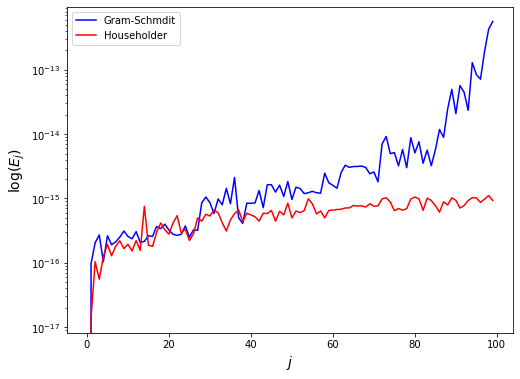

In [9]:
import matplotlib.pyplot as plt

def orthogonality_error(Q):
    n = Q.shape[0]
    E = np.zeros(n)
    for j in range(n):
        for i in range(j):
            E[j] = max(E[j], abs(np.dot(Q[:,i], Q[:,j])))
    
    return E


# Generate 100 x 100 random matrix
np.random.seed(0)
A = np.random.rand(100, 100)

# Calculate QR decomposition
Q_gramschmidt, R_gramschmidt = qr_gramschmidt(A)
Q_householder, R_householder = qr_householder(A)

# Calculate orthogonality errors
E_gramschmidt = orthogonality_error(Q_gramschmidt)
E_householder = orthogonality_error(Q_householder)

# Plot orthogonality errors
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(E_gramschmidt, "b", label="Gram-Schmdit")
plt.plot(E_householder, "r", label="Householder")
plt.yscale("log")
plt.xlabel("$j$", fontsize=14)
plt.ylabel(f"$\log(E_j)$", fontsize=14)
plt.legend()
plt.show()

We can clearly see that as the column number increases the orthogonality errors for the Gram-Schmidt process increases whereas thr Householder remain relatively constant. 